# Assignment 3: Graph Visualization

1. Load a graph database of your choosing from a text file or other source. 
 If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please 
 feel free at this point to load just a small subset of the nodes and edges. 

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other 
  metric of your choosing. You may either code the functions by hand (to build your 
  intuition and insight), or use functions in an existing package. 

3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. 

4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your 
homework submission. 

**About the Data**

Books about US politics Compiled by Valdis Krebs

Nodes represent books about US politics sold by the online bookseller
Amazon.com.  Edges represent frequent co-purchasing of books by the same
buyers, as indicated by the "customers who bought this book also bought
these other books" feature on Amazon.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
g3 =nx.read_gml('D:\Personal\Masters\Rathish-Personal\CUNY\Summer-22\Data620\data-set\\\polbooks\\\polbooks.gml');

C:\Users\rparayil\AppData\Local\activestate\0cb7efd1\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


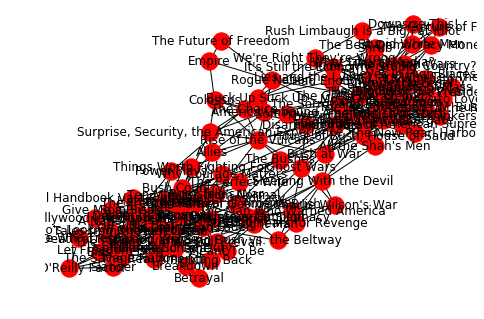

In [3]:
nx.draw(g3,with_labels=True)
plt.show()

In [6]:
print(nx.info(g3))

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


**Diameter**

diameter is the length of the longest path (in number of edges) between two nodes

In [17]:
nx.diameter(g3)

7

**Degree**

Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [9]:
nx.degree(g3, 'The Bushes')

8

This will return a value of 8, as people 'The Bushes' tends to buy 8 other books as well. 

**Clustering Coefficient**

This is an information to see if there clustering around some book. Meaning people who buy some books tends to buy lot of other books


In [11]:
nx.average_clustering(g3)

0.4875267912317314

** Distance **

We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.


In [12]:
nx.shortest_path(g3, 'Ten Minutes from Normal', 'It\'s Still the Economy, Stupid!')

['Ten Minutes from Normal',
 'A National Party No More',
 'Power Plays',
 'Buck Up Suck Up',
 "It's Still the Economy, Stupid!"]

** Eccentricity **

Eccentricity of a node A is defined as the largest distance between A and all other nodes. 
It can be found using nx.eccentricity() function. 

In [13]:
nx.eccentricity(g3,'Ten Minutes from Normal')

5

# Part 2


**Centrality measures**

Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

**Degree Centrality**

Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.


In [23]:
def summaryDegreeCentrality(G):
    cc = nx.degree_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

summaryDegreeCentrality(g3)

,node,centrality
8,A National Party No More,0.240385
12,Off with Their Heads,0.240385
3,Losing Bin Laden,0.221154
84,Bushwhacked,0.221154
72,American Dynasty,0.211538
...,...,...
50,Things Worth Fighting For,0.028846
18,Meant To Be,0.028846
16,Betrayal,0.028846
104,Empire,0.028846


We could see that the book 'A National Party No More' has the highest degree of centrality

**Closeness Centrality :**
    
This is based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes. 

In [30]:
def summaryCloseCentrality(G):
    cc = nx.closeness_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

summaryCloseCentrality(g3)

#close_centrality = nx.closeness_centrality(g3)


,node,centrality
30,The Price of Loyalty,0.414343
58,Rise of the Vulcans,0.412698
49,The Bushes,0.407843
7,Ghost Wars,0.407843
9,Bush Country,0.406250
...,...,...
104,Empire,0.267352
59,Downsize This!,0.253659
63,The Culture of Fear,0.251816
103,The Future of Freedom,0.243560


**Betweenness Centrality :**

It assumes that important nodes connect other nodes.


In [33]:
def summaryBetweenCentrality(G):
    cc = nx.betweenness_centrality(G)
    df = pd.DataFrame.from_dict({
        'node': list(cc.keys()),
        'centrality': list(cc.values())
    })
    return df.sort_values('centrality', ascending=False)

summaryBetweenCentrality(g3)

#bet_centrality = nx.betweenness_centrality(g3, normalized = True, 
#                                              endpoints = False)
#print(bet_centrality)

,node,centrality
30,The Price of Loyalty,0.139478
49,The Bushes,0.103649
9,Bush Country,0.098395
12,Off with Their Heads,0.095262
72,American Dynasty,0.090934
...,...,...
88,The Buying of the President 2004,0.000037
16,Betrayal,0.000000
63,The Culture of Fear,0.000000
103,The Future of Freedom,0.000000
